In [16]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Get swing state data 
df_swing = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')

In [8]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


array([[<AxesSubplot:title={'center':'dem_share'}>]], dtype=object)

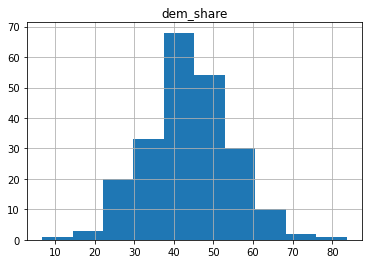

In [9]:
df_swing[['state','county','dem_share']].hist()

<AxesSubplot:>

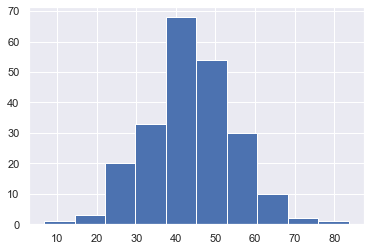

In [10]:
sns.set()
df_swing.dem_share.hist()

Text(0, 0.5, 'percent of vote for Obama')

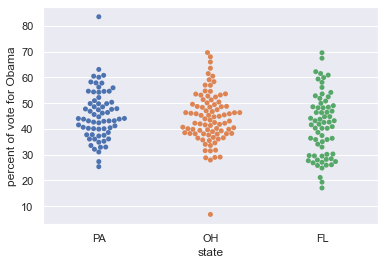

In [15]:
# To avoid "binning bias" we can plot the same data using a bee swarm plot

sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')

## Plot values using an ECDF

In [17]:
# create the x and y values to plot
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1 / len(x))

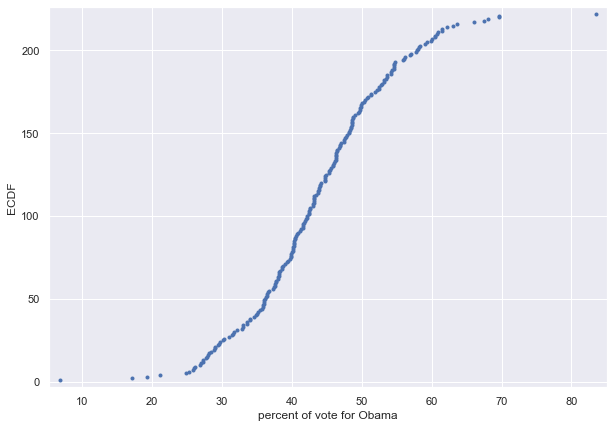

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x, y, marker='.', linestyle='none')
# label the axes!!
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data off the plot edges